In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
sns.set_context('poster')
sns.set_palette('colorblind')

random_seed = 2021

### Problem sheet

This time, you're going to build the model yourself! I've generated some new data with some new truth values, and its your turn to set up the model, and present the results in a way that you understand. Make sure you go through the `pymc3_example` notebook first, and check out `pymc3_answers` if you get lost. 

Note: the final plot from the previous notebook won't work the same way because this function isn't linear.

### First, let's simulate the data we're going to fit!

In [2]:
A_true = 10
phi_true = .5
c_true = 20

x = np.linspace(0, 10, 100)
y = A_true * np.sin(x + phi_true) + c_true
yerr = 6.

np.random.seed(random_seed)
y += np.random.randn(len(y))*yerr

Text(0, 0.5, 'y')

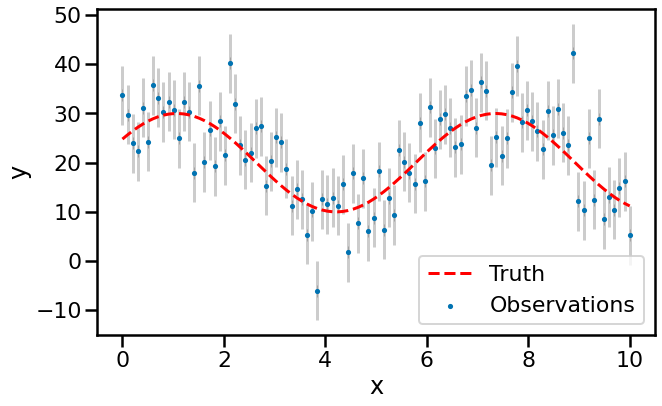

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, zorder=1, s=10, label='Observations')
ax.errorbar(x, y, yerr=yerr, alpha=.2, c='k', zorder=0, fmt='|')
ax.plot(x, A_true * np.sin(x + phi_true) + c_true, ls='--', c='r', lw=3, label='Truth')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')

Now, let's set up a PyMC3 script to model this line! We want to measure the parameters $m$ and $c$ that determine the slope and intercept of the line.

In [4]:
model = pm.Model()

with model:
    # Define the parameters and give them priors
    